# Progetto di Valerio Maglianella - Regressore

## Carico il dataset

In [ ]:
# importo librerie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

# ignora warning etico di boston
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
# carico il dataset da sklearn
dataset = load_boston()
#print(dataset)

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ispezioni preliminari

In [ ]:
# dataset è in formato dizionario --> lo trasformo in dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Distribuzione variabili dip e indip

In [ ]:
#suddivido dataset in x (features) e y (labels)
x = df.drop(columns=['MEDV'])
y = pd.DataFrame(df['MEDV'])

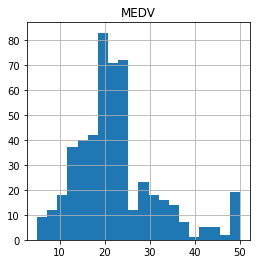

In [ ]:
# plotto labels = variabili dipendenti
y.hist(bins=20, figsize=(4,4))
plt.show()

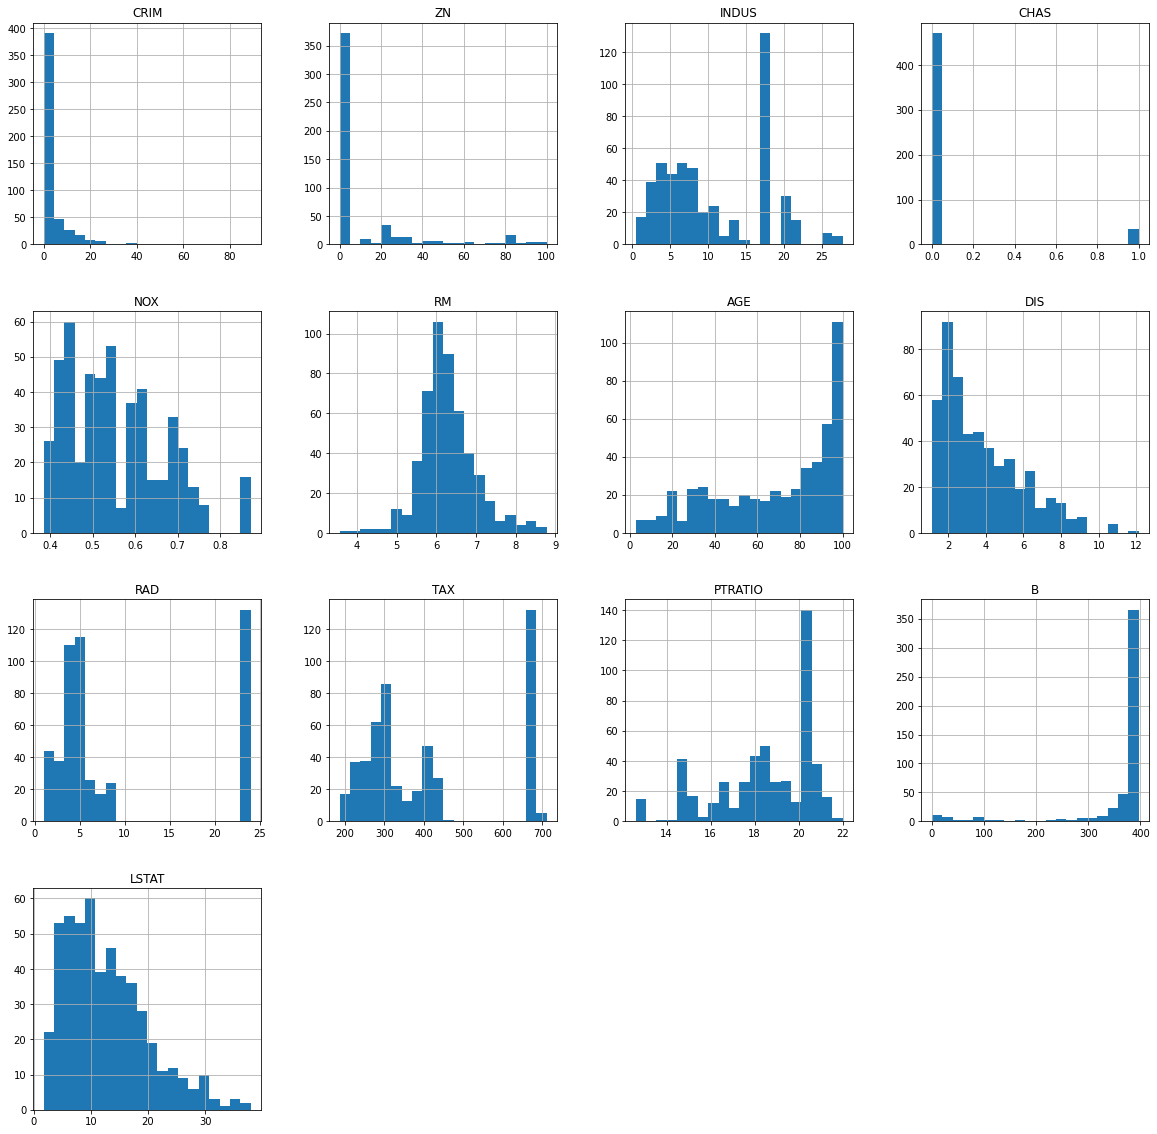

In [ ]:
# plotto features = variabili indipendenti
x.hist(bins=20, figsize=(20,20))
plt.show()
# !REMEMBER!
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

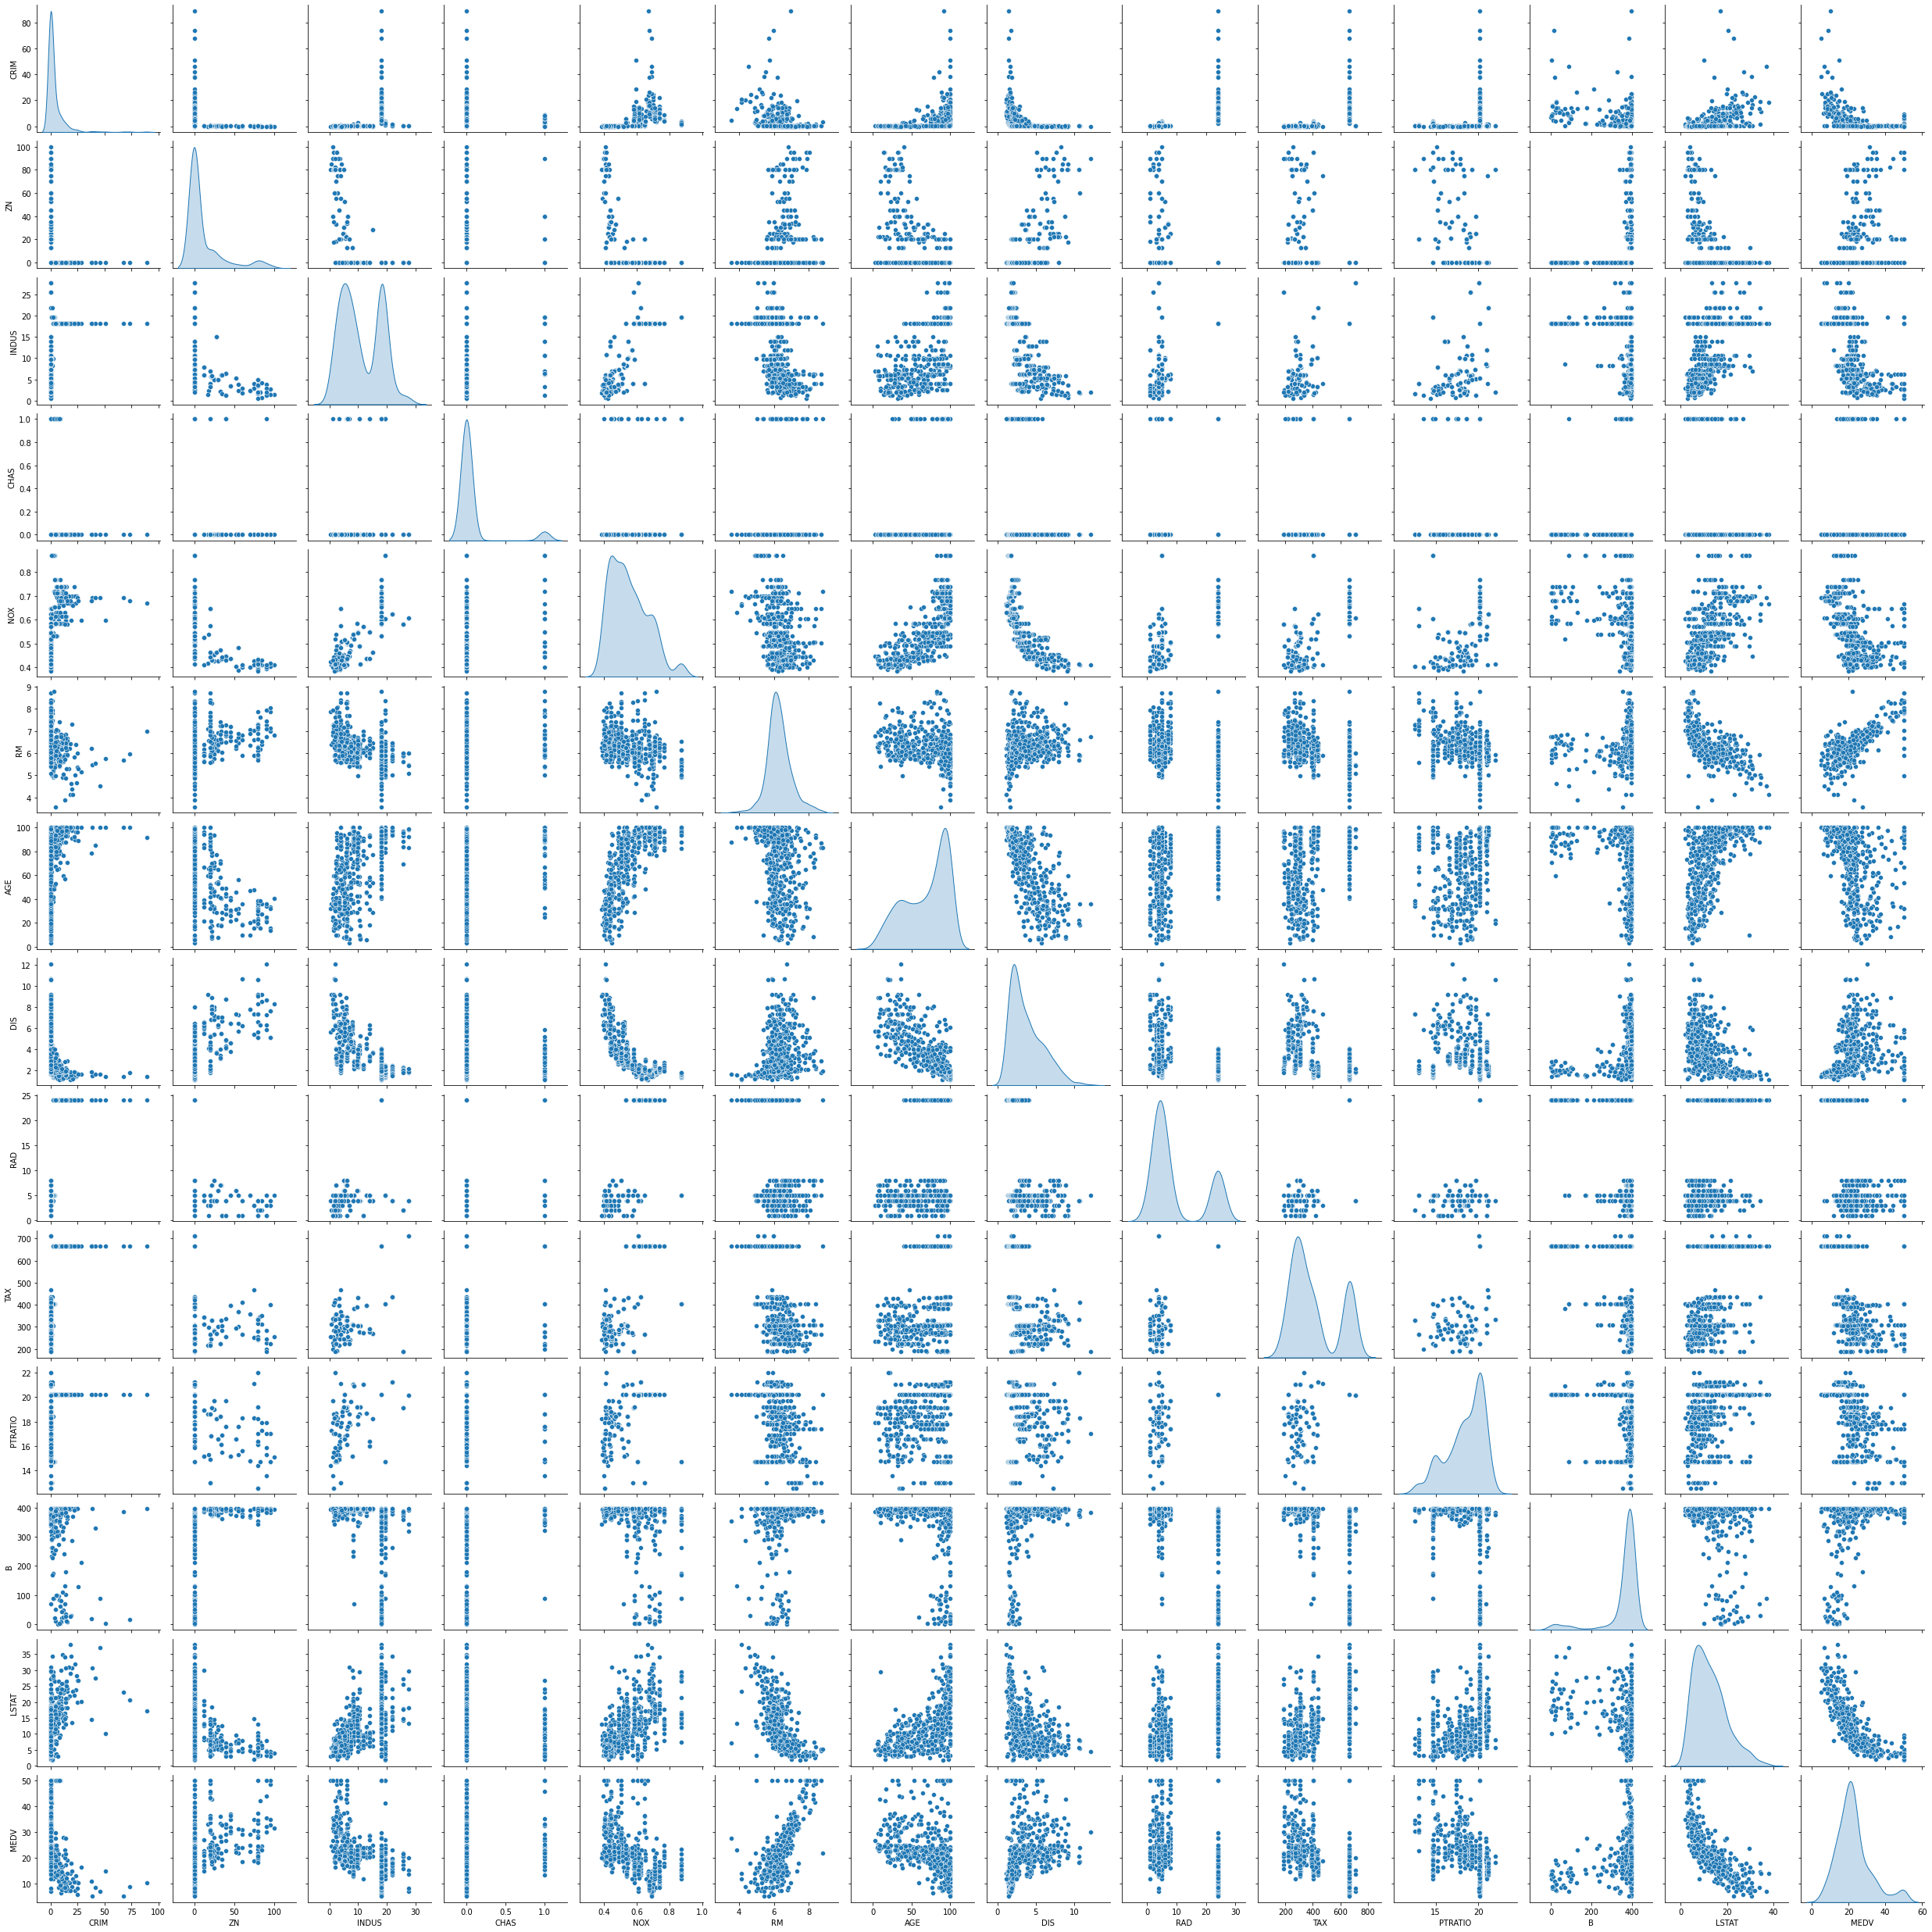

In [ ]:
# # visualizzo la distribuzione dei dati e le correlazioni
sns.pairplot(df, diag_kind = 'kde')
# # da uno sguardo d'insieme si notano varie correlazioni tra le features --> potremmo toglierne alcune in FEATURE SELECTION
# # You can deal with multicollinearity by 1. dropping highly correlated variables; 2. extracting new features with Principal Component Analysis (PCA)

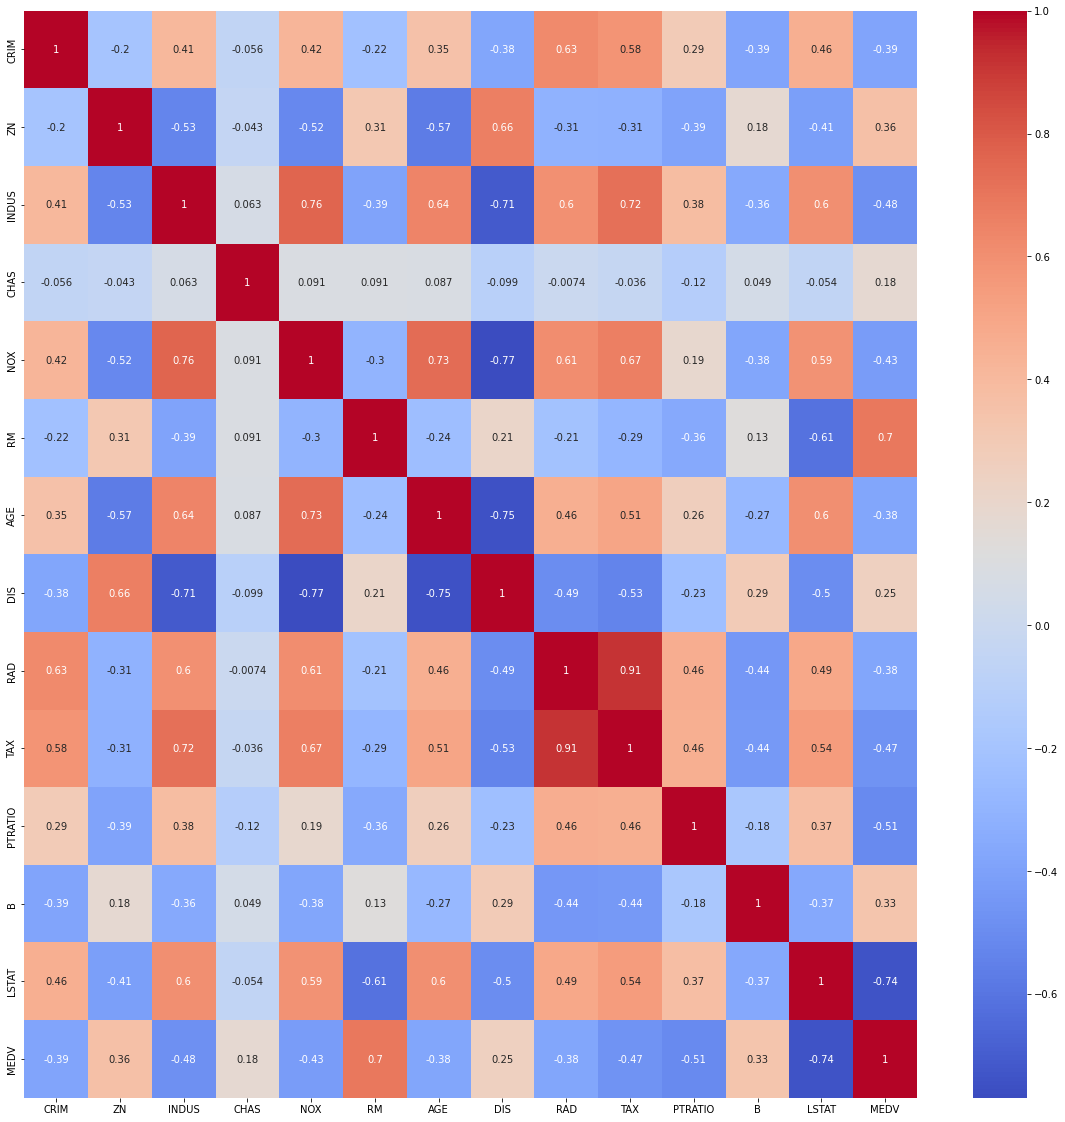

In [ ]:
# esamino più nel dettaglio i coefficienti di correlazione tra le features
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax, cmap='coolwarm')
plt.show()

In [ ]:
# # Visualizzo i grafici accoppiati (pairplot) delle feature con alta correlazione lineare (> ~0.9).
# plt.figure(figsize=(6,6))
# sns.pairplot(df, hue='MEDV', vars = ['', ....])
# plt.show()

## Data Split & Feature Scaling

Abbiamo già verificato che non ci sono dati mancanti/insensati da sostituire. Possiamo dunque procedere con la normalizzazione dei dati.

In [ ]:
# ulteriore check valori nulli: nessuno!
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
if isinstance(y, pd.DataFrame): # metto questo check perchè altrimenti se runno più volte dà errore
  y = y['MEDV'] # labels in formato array --> senza questa trasformazione, gridsearch dà ravel warning:
                  # "A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using  ravel()."

#divido dati in training e test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train_pre = x_train
x_test_pre = x_test

x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


In [ ]:
# applico scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#@markdown Set the decired scaler and model:
used_scaler = 'minmax' #@param ["minmax", "standard", "robust"]

# build the scaler model
if used_scaler == 'standard':
  scaler = StandardScaler()
elif used_scaler == 'minmax':
  scaler = MinMaxScaler()
elif used_scaler == 'robust':
  scaler = RobustScaler()

# fit and transform using the train set
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)

# build the scaler model
if used_scaler == 'standard':
  scaler = StandardScaler()
elif used_scaler == 'minmax':
  scaler = MinMaxScaler()
elif used_scaler == 'robust':
  scaler = RobustScaler()

# fit and transform using the test set
x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000431,0.347368,0.035108,0.0,0.172199,0.591018,0.694130,0.210298,0.260870,0.065010,0.600000,1.000000,0.194185
1,0.000163,0.578947,0.095508,0.0,0.197095,0.557663,0.550978,0.477749,0.173913,0.347992,0.511111,1.000000,0.182070
2,0.002454,0.000000,0.213666,0.0,0.122407,0.412470,0.850669,0.473270,0.086957,0.086042,0.544444,0.989421,0.584285
3,0.000528,0.131579,0.181955,0.0,0.041494,0.379333,0.190525,0.558098,0.130435,0.300191,0.655556,0.998245,0.213915
4,0.041221,0.000000,0.636089,0.0,0.790456,0.266841,0.960865,0.097092,1.000000,0.913958,0.800000,0.959034,0.286258


## SVM Regressor


In [ ]:
#importo, definisco e alleno SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

my_svm = SVR(C=1000, degree=1, gamma='scale', kernel='rbf')
my_svm.fit(x_train, y_train)

SVR(C=1000, degree=1)

In [ ]:
#predico dati di test
train_pred = my_svm.predict(x_train)
test_pred = my_svm.predict(x_test)

#valuto prestazioni
rmse = (np.sqrt(mean_squared_error(y_train, train_pred)))
r2 = r2_score(y_train, train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_test, test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.8494830667999007
R2 score is 0.9578688621652591


The model performance for testing set
--------------------------------------
RMSE is 3.6196427680323793
R2 score is 0.8570521293341925


In [ ]:
# # FEATURE IMPORTANCE (SOLO CON KERNEL LINEAR PER SVR)
# # visualizzo i coefficienti di ciascuna feature
# coeff_df = pd.DataFrame(my_svm.coef_.T, x.columns, columns = ['Coefficient'])  # data, index, columns
# coeff_sort = coeff_df.sort_values(by='Coefficient', ascending=False)
# print(coeff_sort)

# # plotto l'importanza delle features
# plt.figure(figsize = (10, 10))
# plt.barh(x.columns, np.abs(coeff_sort['Coefficient']), align='center')
# plt.xlabel('Coefficient')
# plt.ylabel('Features')
# plt.title('Linear Regression feature importance')

### SVM Grid Search

In [ ]:
# # faccio stratified crossvalidation con grid search
SVM_scoring = ['r2']
SVM_parameters = {
              "C": [0.5, 1.0, 10, 100, 1000],  # regularization parameter (must be strictly positive) It tells us how much misclassification we want to avoid (higher c –-> Hard margin & risk of overfitting; lower C –-> Soft margin)
              "kernel":["linear","rbf", "poly", "sigmoid"], # take data as input and transform it into the required form to better solve the classification task  
              "degree":[1, 2, 3, 4, 5],  # degree of the polynomial kernel function - ignored by other kernels
              "gamma":['scale', 'auto'],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ Decreasing the Gamma will result that finding the correct hyperplane will consider points at greater distances so more and more points will be used --> less overfitting
              }

SVM = GridSearchCV(
                  SVR(), # stimatore (algoritmo di classificazione)
                  SVM_parameters, # griglia dei parametri
                  scoring = SVM_scoring, # parametri per la valutazione del modello
                  refit = "r2", # refit an estimator using the best found parameters (using the scorer r2) on the whole dataset
                  cv = 5, # stratified 5-fold CV
                  n_jobs=-1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette meno di 74s
SVM.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             refit='r2', scoring=['r2'])

In [ ]:
print("SVM best parameters:\n", SVM.best_params_)
print("SVM train r2:\n", SVM.score(x_train, y_train))
print("SVM validation best r2 score:\n", SVM.best_score_) # mean cross-validated score of the best_estimator

SVM best parameters:
 {'C': 1000, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM train r2:
 0.9578688621652591
SVM validation best r2 score:
 0.8205498255219986


In [ ]:
#predico dati di test
train_pred = SVM.best_estimator_.predict(x_train)
test_pred = SVM.best_estimator_.predict(x_test)

#valuto prestazioni
rmse = (np.sqrt(mean_squared_error(y_train, train_pred)))
r2 = r2_score(y_train, train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_test, test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.8494830667999007
R2 score is 0.9578688621652591


The model performance for testing set
--------------------------------------
RMSE is 3.6196427680323793
R2 score is 0.8570521293341925


In [ ]:
# stampo tutte (o in parte) le labels e predizioni per vedere se a occhio sono sensate
print('LABELS\t--  PREDICTIONS')
for e in list(zip(y_test, test_pred)):
  print(f'{e[0]}\t--  {e[1]:.1f}')

LABELS	--  PREDICTIONS
28.2	--  27.3
23.9	--  18.1
16.6	--  17.7
22.0	--  18.2
20.8	--  21.5
23.0	--  19.1
27.9	--  30.7
14.5	--  14.4
21.5	--  16.6
22.6	--  21.4
23.7	--  23.8
31.2	--  24.4
19.3	--  19.7
19.4	--  21.4
19.4	--  17.7
27.9	--  21.4
13.9	--  14.9
50.0	--  44.2
24.1	--  23.0
14.6	--  22.9
16.2	--  16.6
15.6	--  13.3
23.8	--  19.8
25.0	--  21.9
23.5	--  24.9
8.3	--  11.6
13.5	--  9.4
17.5	--  18.4
43.1	--  37.0
11.5	--  12.0
24.1	--  19.8
18.5	--  16.9
50.0	--  50.4
12.6	--  13.5
19.8	--  16.7
24.5	--  21.6
14.9	--  14.6
36.2	--  30.7
11.9	--  9.7
19.1	--  17.1
22.6	--  20.0
20.7	--  20.5
30.1	--  25.1
13.3	--  16.8
14.6	--  14.2
8.4	--  7.9
50.0	--  46.1
12.7	--  13.1
25.0	--  19.8
18.6	--  19.5
29.8	--  23.2
22.2	--  17.7
28.7	--  22.1
23.8	--  19.4
8.1	--  7.0
22.2	--  21.3
6.3	--  22.5
22.1	--  19.5
17.5	--  15.8
48.3	--  41.1
16.7	--  13.7
26.6	--  23.5
8.5	--  12.7
14.5	--  16.2
23.7	--  22.3
37.2	--  35.4
41.7	--  41.8
16.5	--  18.8
21.7	--  19.1
22.7	--  17.0
23.0	-

## Decision Tree Regressor

In [ ]:
#importo, definisco e alleno tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(criterion='squared_error', max_depth=6, max_features=None, min_samples_leaf=1, splitter='best', random_state=1)
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [ ]:
#predico dati di test
train_pred = tree.predict(x_train)
test_pred = tree.predict(x_test)

#valuto prestazioni
rmse = (np.sqrt(mean_squared_error(y_train, train_pred)))
r2 = r2_score(y_train, train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_test, test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.0435131411660765
R2 score is 0.9485651664023145


The model performance for testing set
--------------------------------------
RMSE is 3.923524961981689
R2 score is 0.8320426133616867


    Feature  Importance
1        ZN    0.000000
2     INDUS    0.000000
11        B    0.001012
3      CHAS    0.001886
8       RAD    0.002091
6       AGE    0.002998
9       TAX    0.009472
0      CRIM    0.015752
10  PTRATIO    0.024968
4       NOX    0.031899
7       DIS    0.081037
5        RM    0.254570
12    LSTAT    0.574317


Text(0.5, 1.0, 'Decision Tree feature importance')

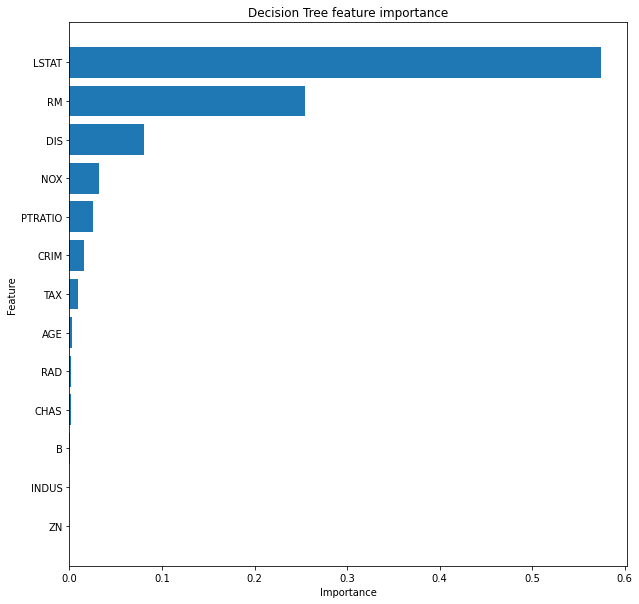

In [ ]:
# Create a dataframe with feature importances
importances = pd.DataFrame({'Feature': x.columns, 'Importance': tree.feature_importances_})

# Sort the dataframe by importance in ascending order
importances = importances.sort_values(by='Importance', ascending=True)
print(importances)

# Plot the feature importances in ascending order
plt.figure(figsize=(10, 10))
plt.barh(importances['Feature'], importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree feature importance')


Text(0.5, 1.0, 'Decision Tree Regression')

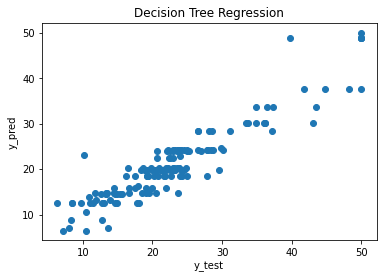

In [ ]:
# scatterplot dei valori reali vs predetti dal modello di MEDV

plt.scatter(y_test, test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Decision Tree Regression')

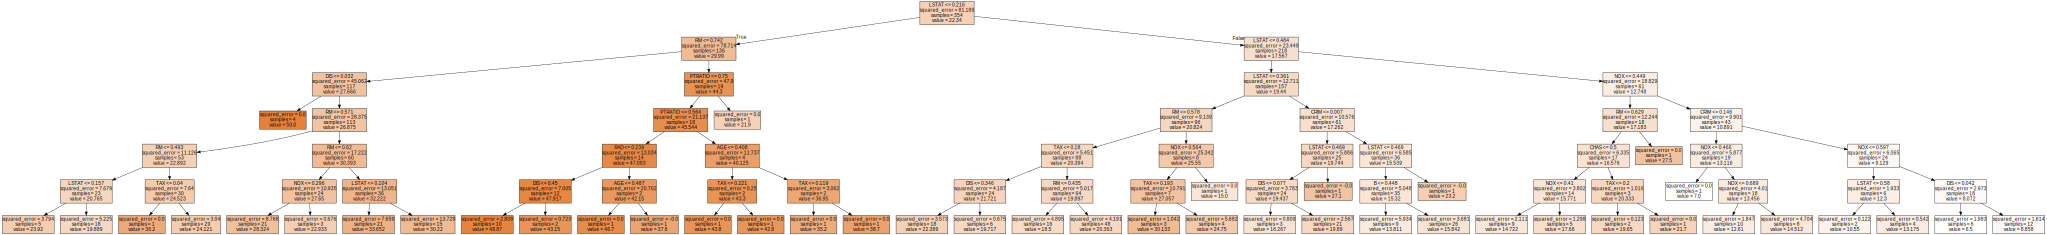

In [ ]:
import graphviz

# rappresentazione grafica
Decision_Tree = export_graphviz(
                    tree, 
                    out_file=None, 
                    feature_names=x.columns,  
                    filled=True
                    )
graphviz.Source(Decision_Tree, format="png") 

### Tree Grid Search

In [ ]:
# # faccio stratified crossvalidation con grid search
tree_scoring = ['r2']
tree_parameters = { 
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion':['squared_error', 'absolute_error'],
    'min_samples_leaf': [1, 4, 6],
    "splitter": ["best", "random"],
}

tree = GridSearchCV(
                  DecisionTreeRegressor(random_state=1), # stimatore (algoritmo di classificazione)
                  tree_parameters, # griglia dei parametri
                  scoring = tree_scoring, # parametri per la valutazione del modello
                  refit = "r2", # refit an estimator using the best found parameters (using the scorer r2) on the whole dataset
                  cv = 5, # stratified 5-fold CV
                  n_jobs=-1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette meno di 4s
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 6],
                         'splitter': ['best', 'random']},
             refit='r2', scoring=['r2'])

In [ ]:
print("tree best parameters:\n", tree.best_params_)
print("tree train r2:\n", tree.score(x_train, y_train))
print("tree validation best r2 score:\n", tree.best_score_) # mean cross-validated score of the best_estimator

tree best parameters:
 {'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'splitter': 'best'}
tree train r2:
 0.9485651664023145
tree validation best r2 score:
 0.7474883885080482


In [ ]:
#predico dati di test
train_pred = tree.best_estimator_.predict(x_train)
test_pred = tree.best_estimator_.predict(x_test)

#valuto prestazioni
rmse = (np.sqrt(mean_squared_error(y_train, train_pred)))
r2 = r2_score(y_train, train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_test, test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.0435131411660765
R2 score is 0.9485651664023145


The model performance for testing set
--------------------------------------
RMSE is 3.923524961981689
R2 score is 0.8320426133616867


In [ ]:
# stampo tutte (o in parte) le labels e predizioni per vedere se a occhio sono sensate
print('INDEX\tLABELS\t--  PREDICTIONS')
for i, e in enumerate(list(zip(y_test, test_pred))):
  print(f'{i+1}\t{e[0]}\t--  {e[1]:.1f}')

INDEX	LABELS	--  PREDICTIONS
1	28.2	--  28.3
2	23.9	--  24.1
3	16.6	--  14.7
4	22.0	--  19.9
5	20.8	--  18.5
6	23.0	--  20.4
7	27.9	--  24.1
8	14.5	--  15.8
9	21.5	--  19.6
10	22.6	--  22.4
11	23.7	--  24.1
12	31.2	--  28.3
13	19.3	--  19.9
14	19.4	--  18.5
15	19.4	--  18.5
16	27.9	--  18.5
17	13.9	--  13.2
18	50.0	--  37.6
19	24.1	--  19.9
20	14.6	--  14.5
21	16.2	--  18.5
22	15.6	--  14.5
23	23.8	--  20.4
24	25.0	--  24.1
25	23.5	--  23.9
26	8.3	--  8.9
27	13.5	--  14.7
28	17.5	--  18.5
29	43.1	--  30.2
30	11.5	--  12.6
31	24.1	--  24.1
32	18.5	--  14.7
33	50.0	--  48.9
34	12.6	--  14.5
35	19.8	--  20.4
36	24.5	--  19.9
37	14.9	--  14.5
38	36.2	--  30.2
39	11.9	--  13.2
40	19.1	--  15.8
41	22.6	--  19.9
42	20.7	--  19.9
43	30.1	--  24.1
44	13.3	--  14.7
45	14.6	--  12.6
46	8.4	--  12.6
47	50.0	--  48.9
48	12.7	--  8.9
49	25.0	--  18.5
50	18.6	--  20.4
51	29.8	--  24.8
52	22.2	--  20.4
53	28.7	--  24.1
54	23.8	--  20.4
55	8.1	--  7.0
56	22.2	--  24.1
57	6.3	--  12.6
58	22.1	--  23.9
5